In [3]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [13]:
n=['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\twitter_training.csv", names=n)

In [15]:
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [29]:
print(df.shape)
print(df.info())
print(df.describe(include=object))
print(df['Sentiment'].unique())
print(df.nunique)
print(df.isnull().sum())

(74682, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
                       Topic Sentiment  \
count                  74682     74682   
unique                    32         4   
top     TomClancysRainbowSix  Negative   
freq                    2400     22542   

                                                     Text  
count                                               73996  
unique                                              69491  
top     At the same time, despite the fact that there ...  
freq                                                  172  
['Positive' 'Neutral' 'Negative' 'Irrelevant']
<bound method DataFrame.nunique of

In [33]:
df.dropna(inplace=True)

In [35]:
train.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [39]:
df.shape

(73996, 4)

In [41]:
df.duplicated().sum()

2340

In [43]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13576\641758608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=df,palette='viridis')


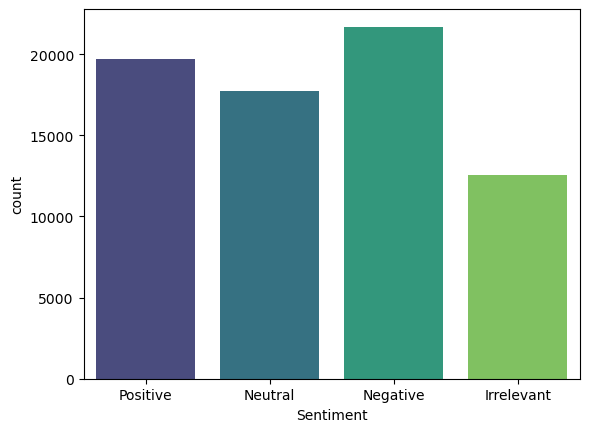

In [49]:
sns.countplot(x = 'Sentiment',data=df,palette='viridis')
plt.show()

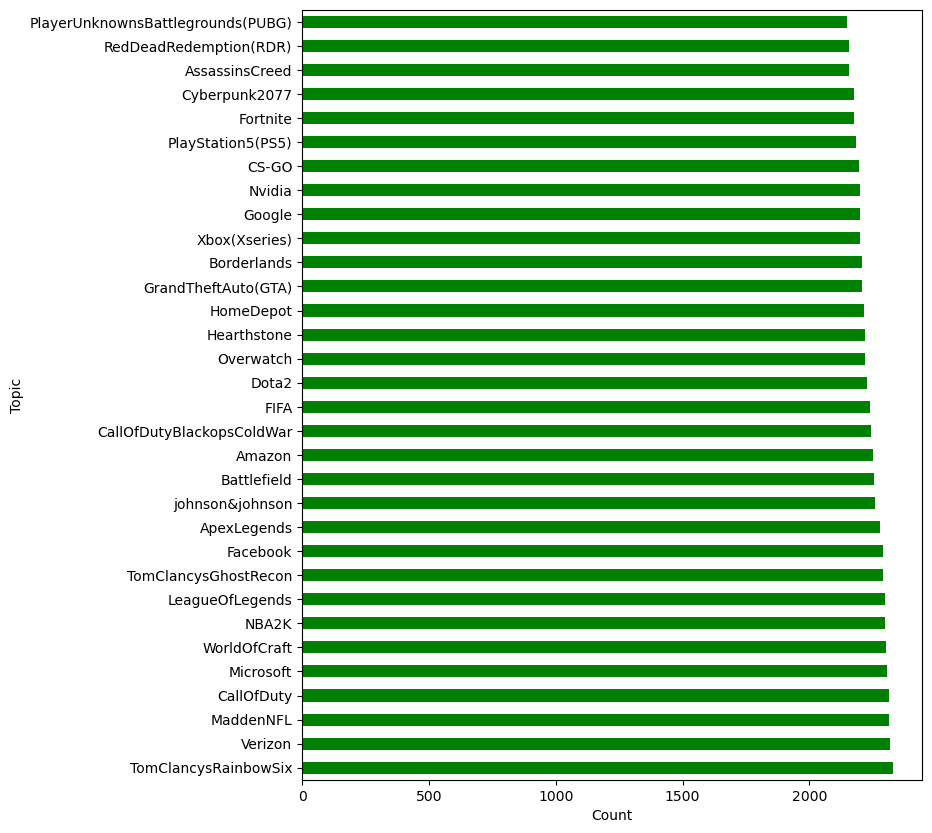

In [47]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

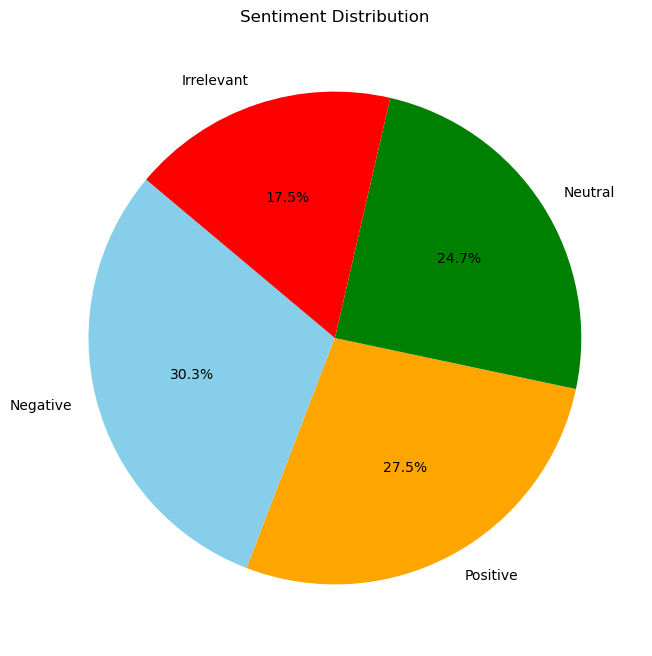

In [51]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

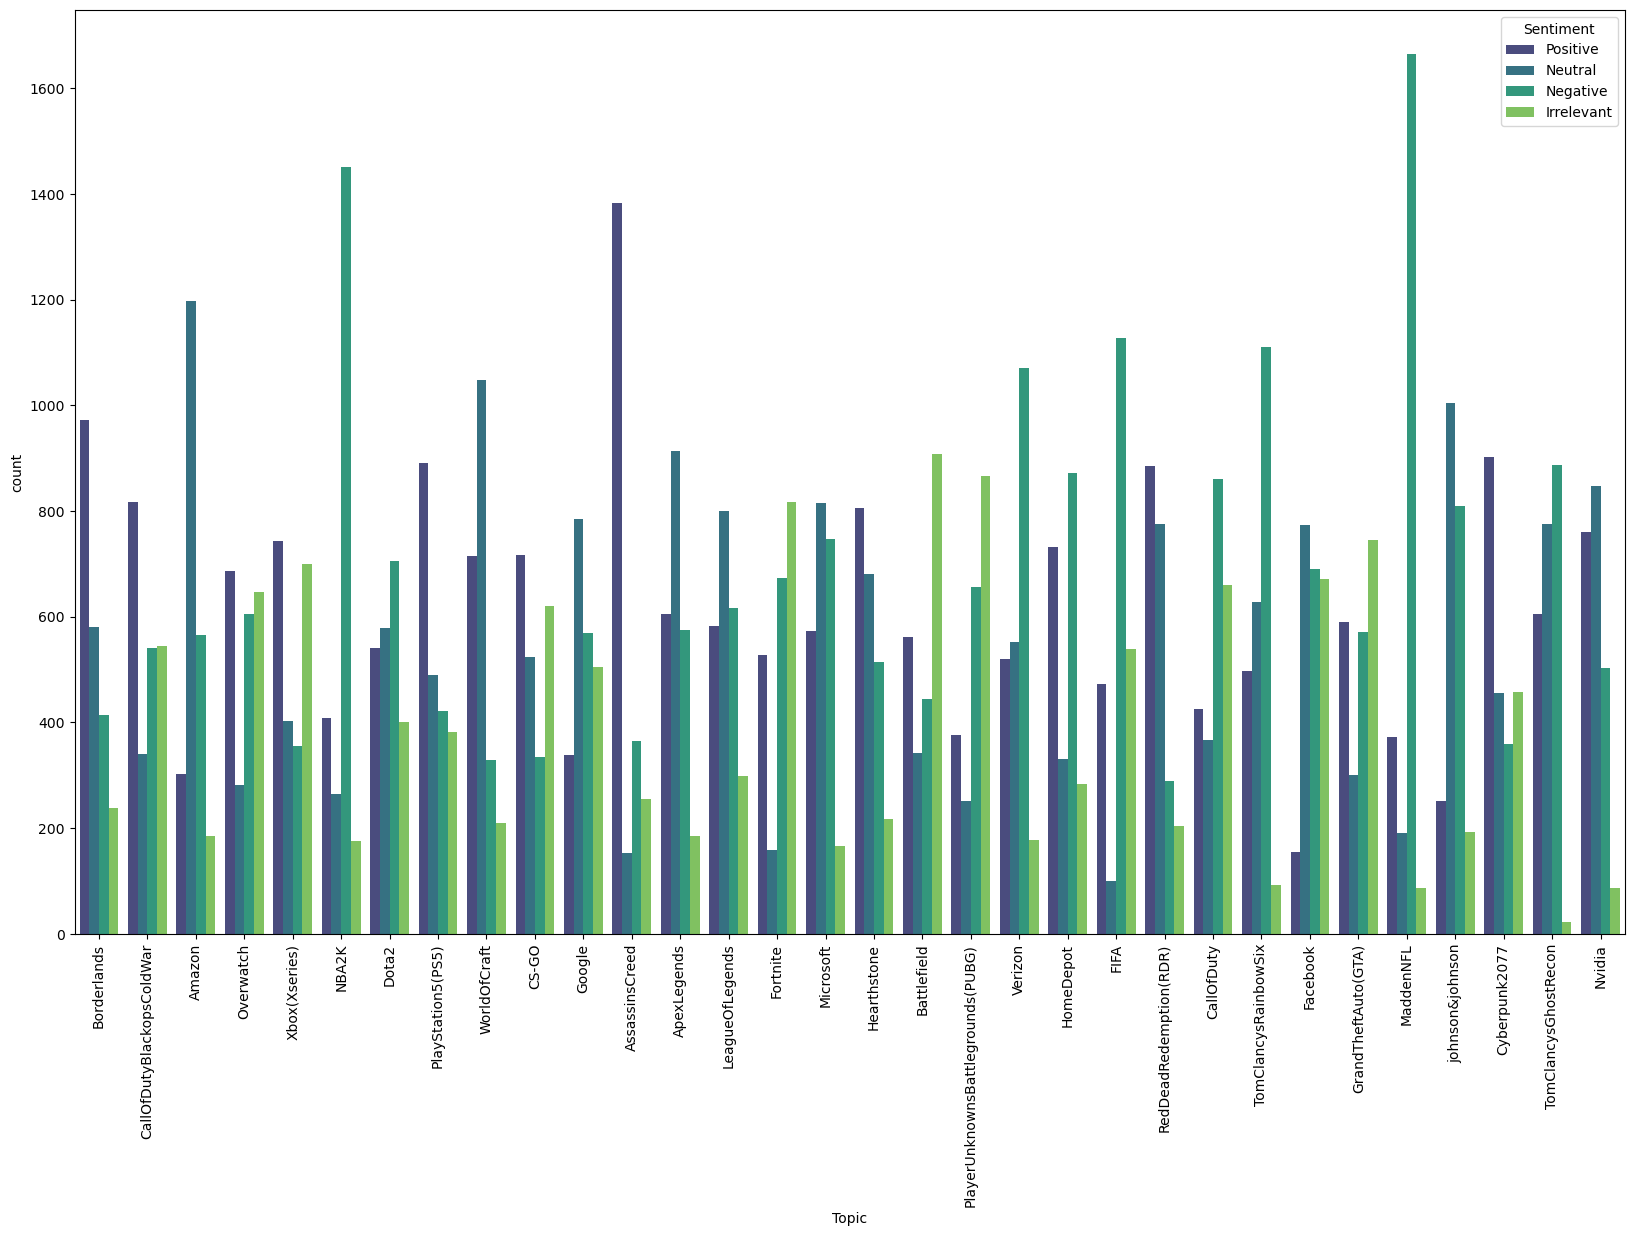

In [53]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [55]:
## Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

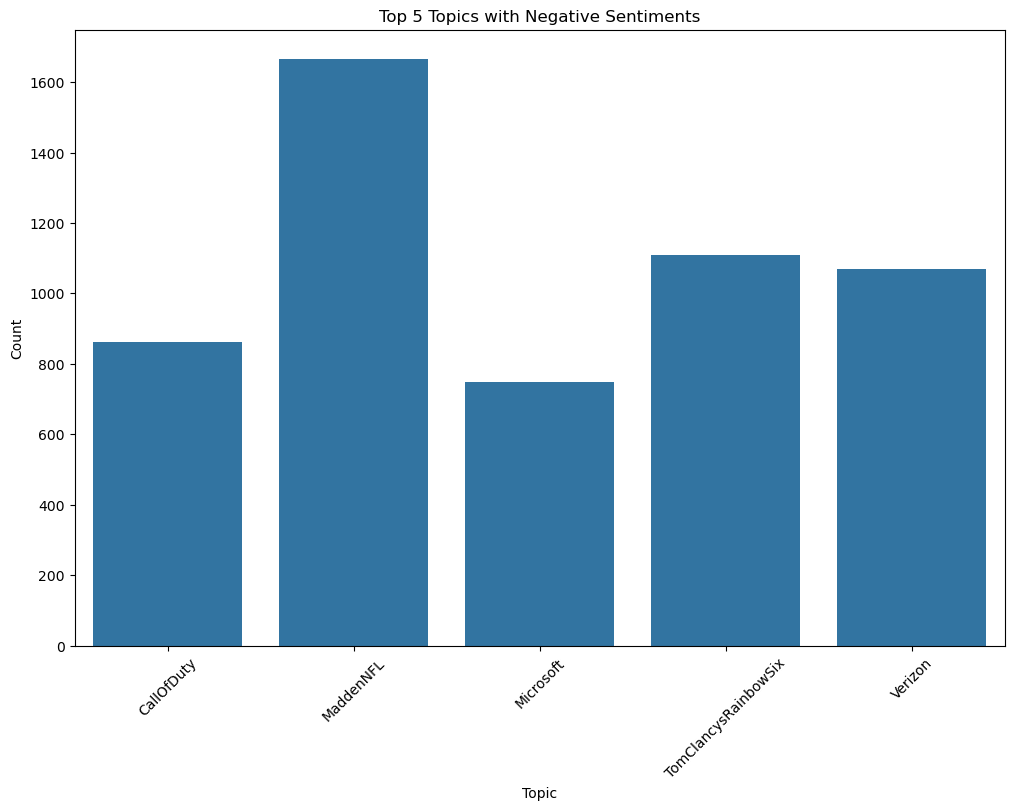

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

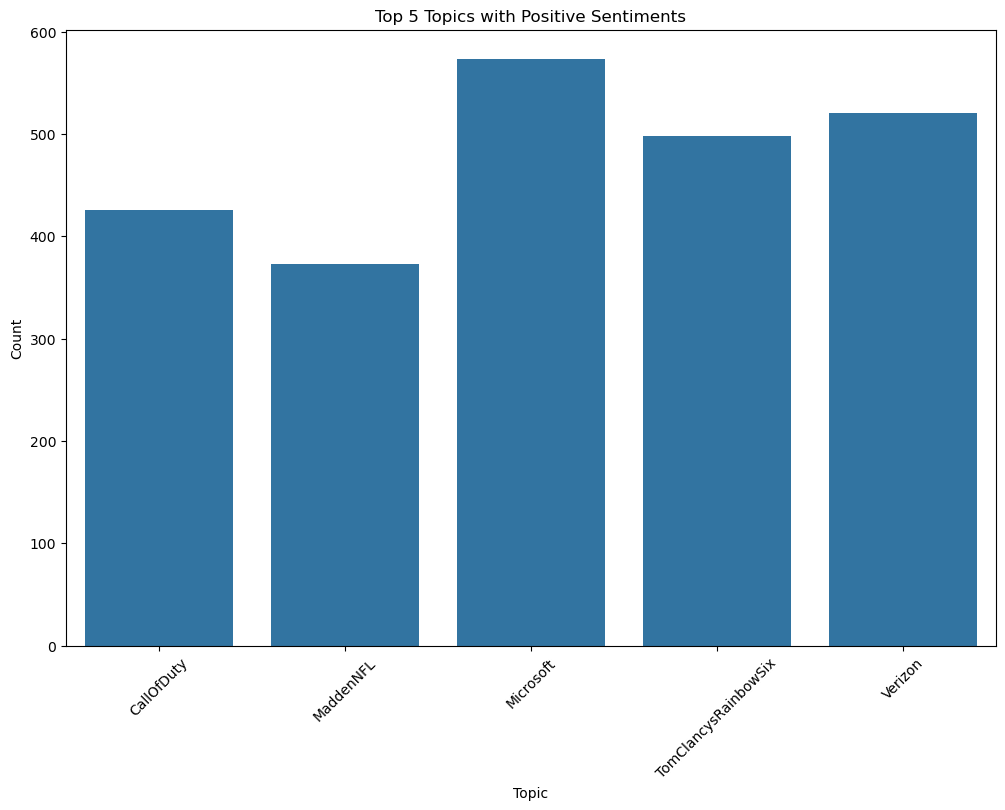

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

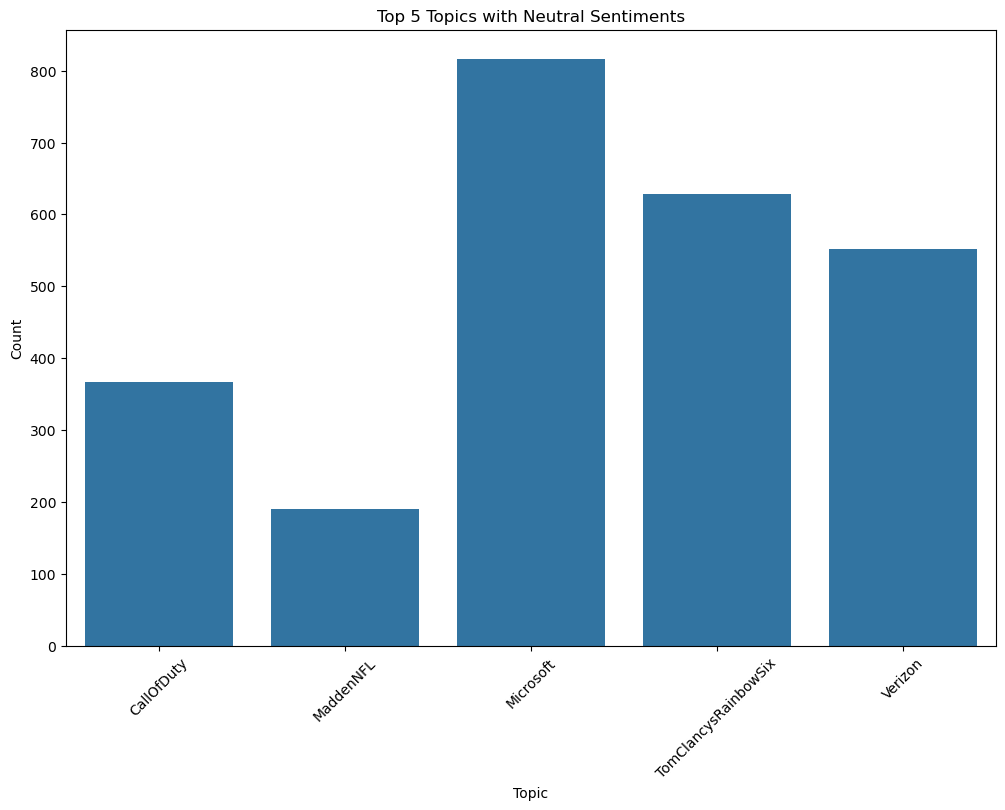

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

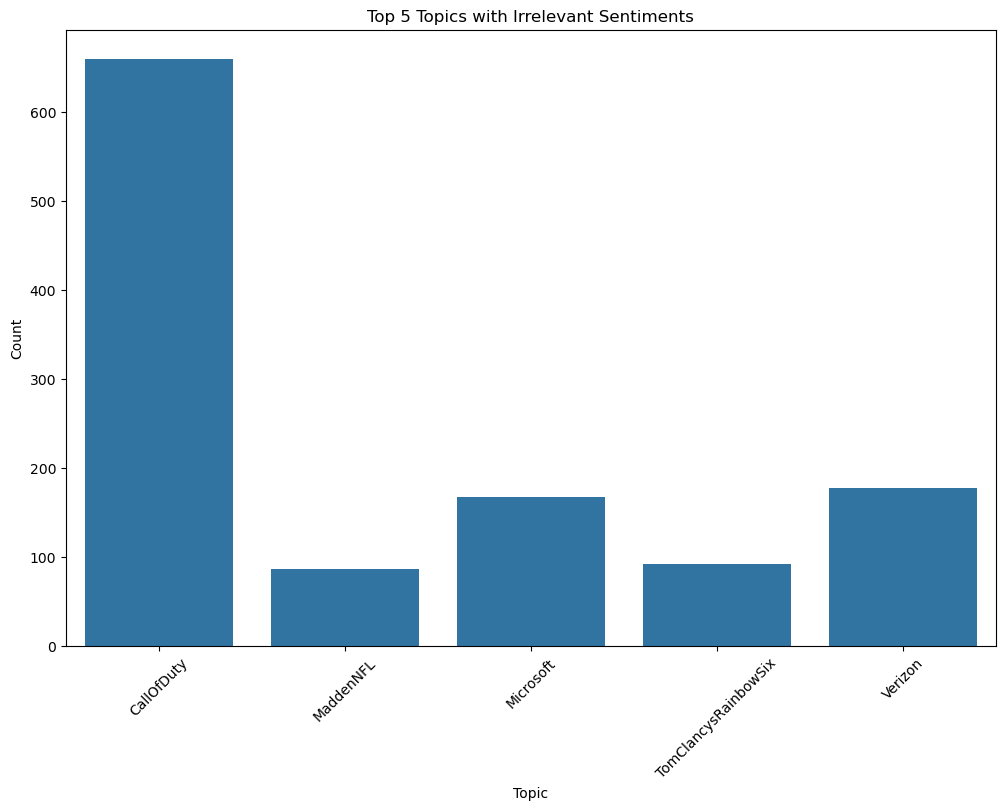

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

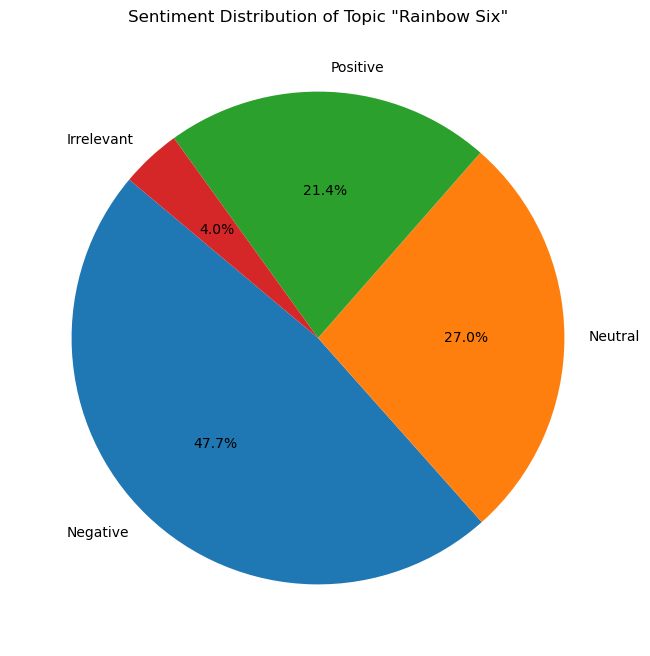

In [75]:
# Filter the dataset to include only entries related to the topic 'Rainbow'
r_data = df[df['Topic'] == 'TomClancysRainbowSix']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = r_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Rainbow Six"')
plt.show()

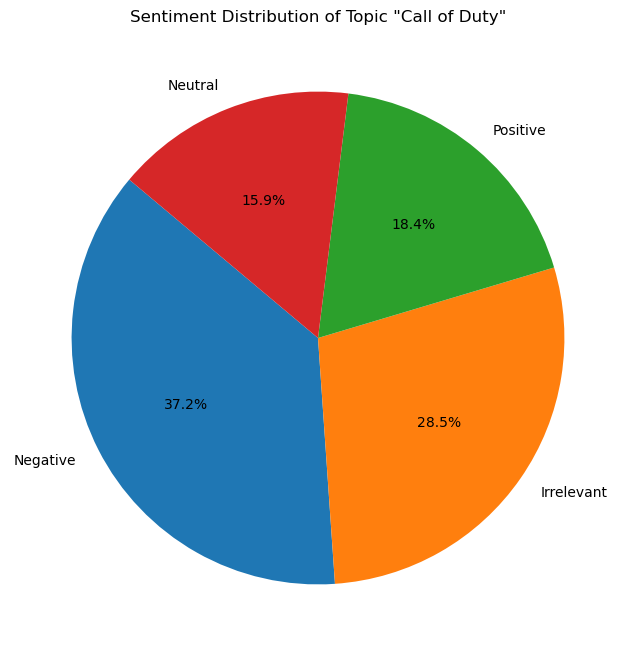

In [81]:
# Filter the dataset to include only entries related to the topic 'COD'
cod_data = df[df['Topic'] == 'CallOfDuty']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = cod_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Call of Duty"')
plt.show()

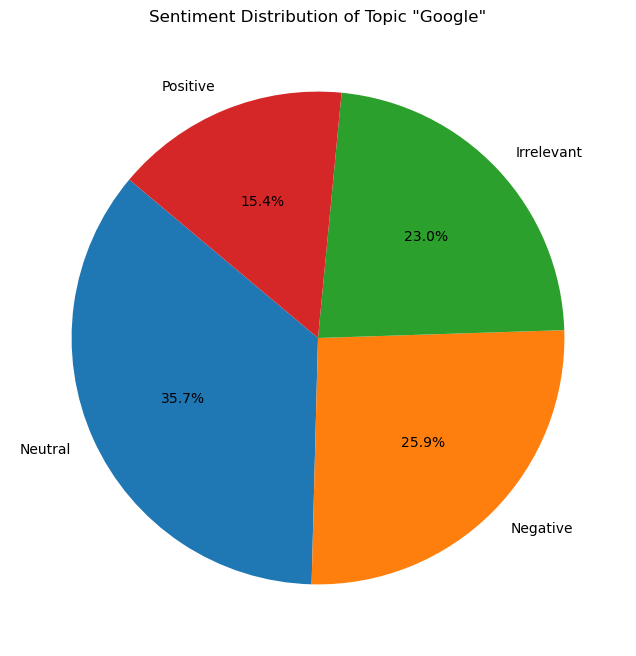

In [77]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

In [85]:
df['msg_len'] = df['Text'].apply(len)

In [87]:
df.head()

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


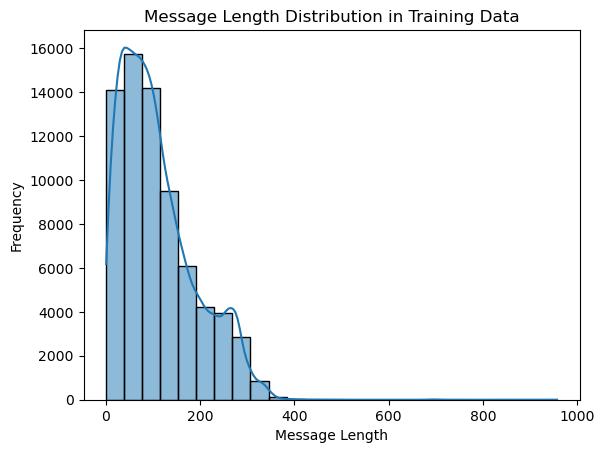

In [91]:
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13576\756236247.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


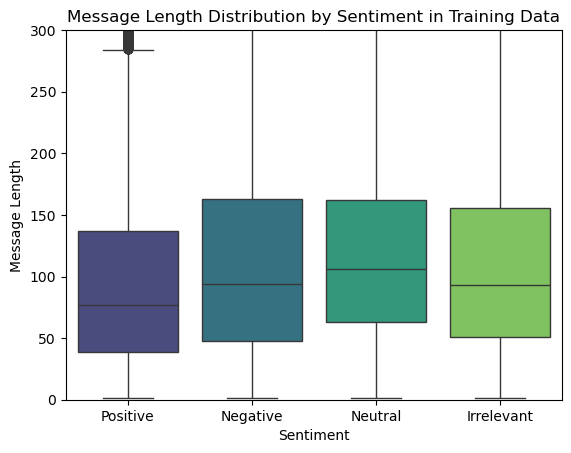

In [99]:
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()  

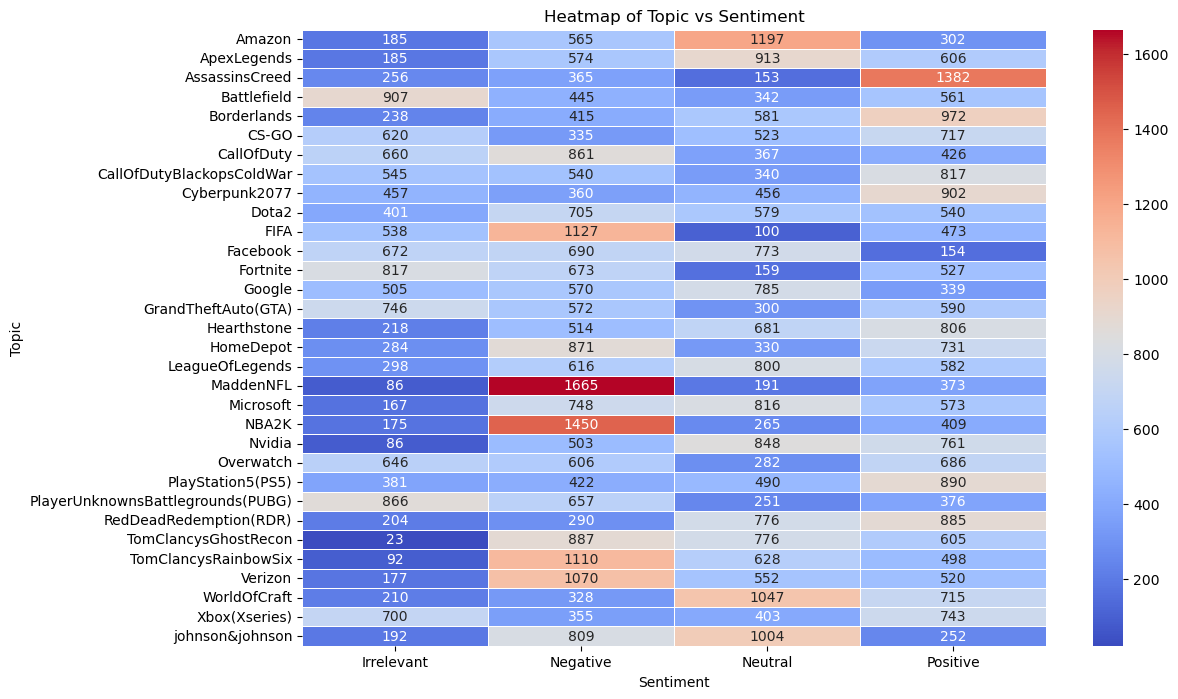

In [101]:
# Create the crosstab
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

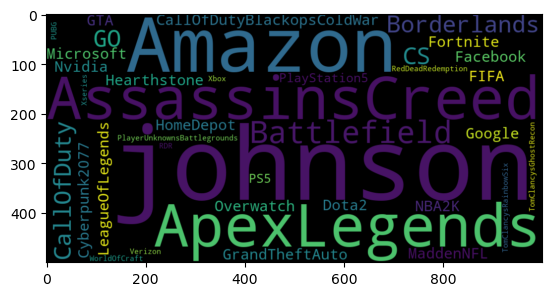

In [103]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

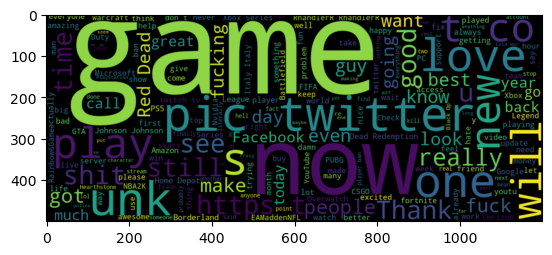

In [107]:
corpus = ' '.join(df['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')